<a href="https://colab.research.google.com/github/Mya-mori/Kaggle/blob/master/%E3%83%88%E3%83%AC%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("train.csv")

In [297]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



前処理　データ分析 Cabin drop


In [0]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [0]:
deck = df["Cabin"].dropna()

levels = []

for level in deck:
  levels.append(level[0])

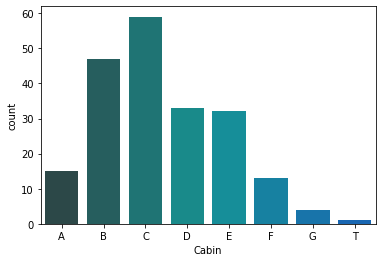

In [300]:
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.countplot("Cabin", data=cabin_df, order=sorted(set(levels)), palette = "winter_d")

In [0]:
cabin_df = cabin_df[cabin_df["Cabin"] != "T"]

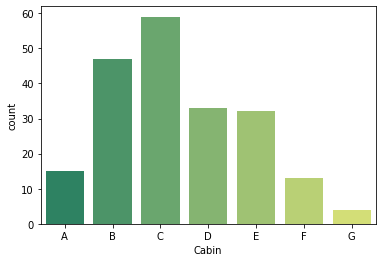

In [302]:
sns.countplot("Cabin", data=cabin_df, order=sorted(set(cabin_df["Cabin"])), palette = "summer")

In [0]:
df["Cabin"] = cabin_df

In [304]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,E,S
3,1,1,female,35.0,1,0,53.1000,G,S
4,0,3,male,35.0,0,0,8.0500,C,S


In [0]:
df["Family_scale"] = df["SibSp"] + df["Parch"] + 1

In [306]:
df["Family_scale"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_scale, dtype: int64

In [0]:
df = df.drop(["SibSp", "Parch"], axis = 1)

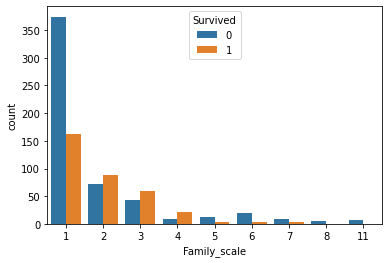

In [308]:
sns.countplot(x = df["Family_scale"], hue = df["Survived"])

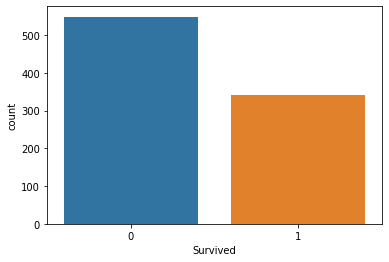

In [309]:
sns.countplot(x = df["Survived"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


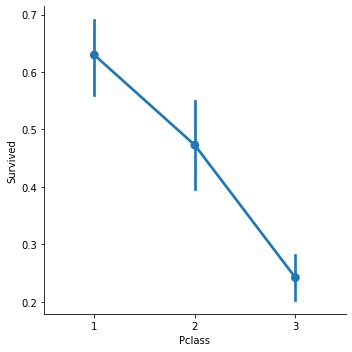

In [310]:
sns.factorplot("Pclass", "Survived", data = df, order = [1, 2, 3])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


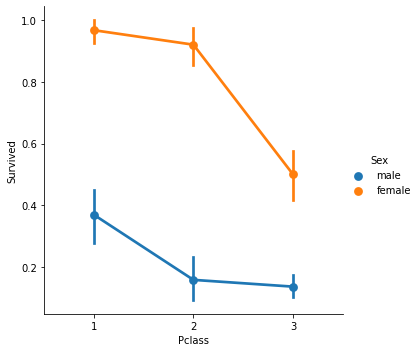

In [311]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = df, order = [1, 2, 3])

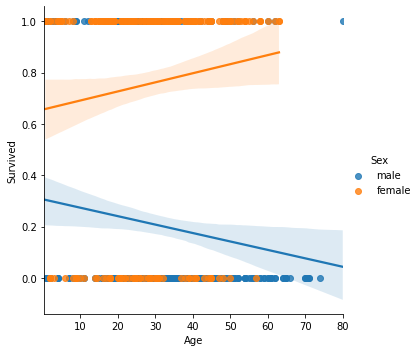

In [312]:
sns.lmplot("Age", "Survived", hue = "Sex", data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


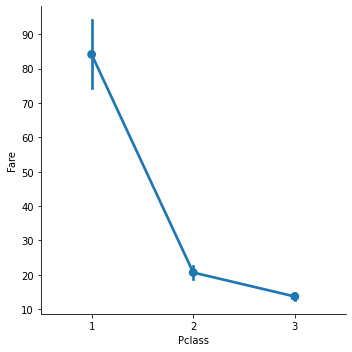

In [313]:
sns.factorplot("Pclass", "Fare", data = df, order = [1, 2, 3])

In [0]:
corr = df["Pclass"].corr(df["Fare"])

In [315]:
corr

-0.5494996199439074

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


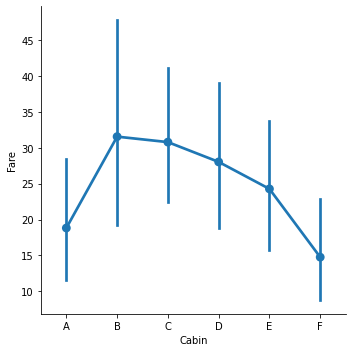

In [316]:
sns.factorplot(x = "Cabin", y = "Fare", data = df, order = ["A", "B", "C", "D", "E", "F"])

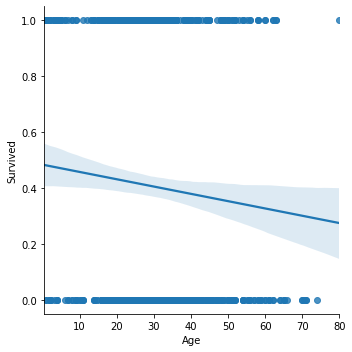

In [317]:
sns.lmplot("Age", "Survived", data = df)

In [318]:
corr =  df.corr()
corr

,Survived,Pclass,Age,Fare,Family_scale
Survived,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.257307,-0.549500,0.096067,1.000000,0.217138
Family_scale,0.016639,0.065997,-0.301914,0.217138,1.000000


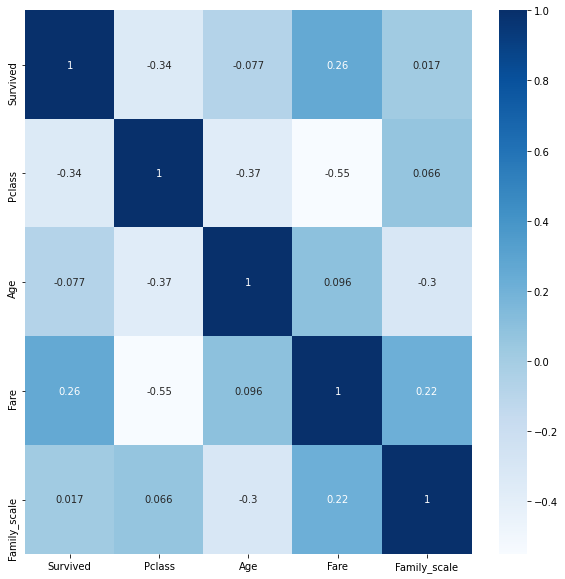

In [319]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = corr, annot = True, cmap="Blues" )

In [320]:
df.isnull().sum() 

Survived          0
Pclass            0
Sex               0
Age             177
Fare              0
Cabin           688
Embarked          2
Family_scale      0
dtype: int64

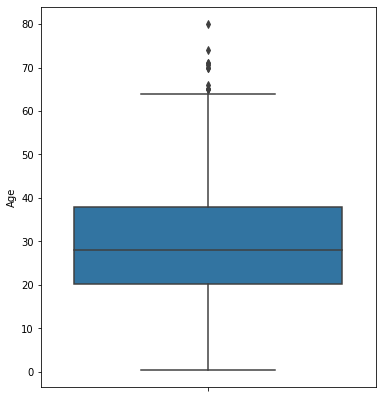

In [321]:
plt.figure(figsize=(6, 7))
sns.boxplot(x = df["Age"], orient = "v")

In [0]:
df[df["Age"] > 64] = 64 #64才以上を外れ値とみなす

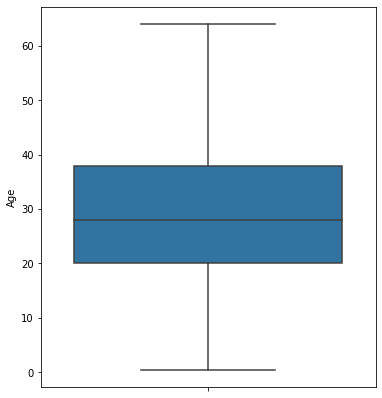

In [323]:
plt.figure(figsize=(6, 7))
sns.boxplot(x = df["Age"], orient = "v")

In [324]:
df["Age"].describe()

count    714.000000
mean      29.610182
std       14.286172
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       64.000000
Name: Age, dtype: float64

In [0]:
df["Age"] = df["Age"].fillna(df["Age"].median()) #欠損値を最頻値で示す

In [326]:
df["Age"].describe()

count    891.000000
mean      29.290314
std       12.803057
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       64.000000
Name: Age, dtype: float64

In [0]:
df = df.drop("Cabin", axis = 1) #欠損値が多すぎるため削除

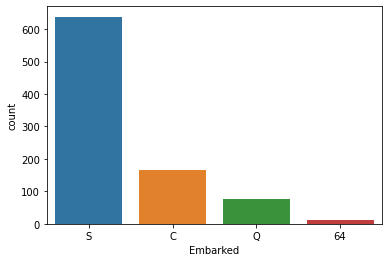

In [328]:
sns.countplot("Embarked", data = df)

In [329]:
df["Embarked"].value_counts()

S     638
C     165
Q      75
64     11
Name: Embarked, dtype: int64

In [345]:
df["Embarked"][df["Embarked"] == 64] = "S" #NANが64になってる.....
df["Embarked"] = df["Embarked"].fillna("S")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [346]:
df["Embarked"].value_counts()

S    651
C    165
Q     75
Name: Embarked, dtype: int64

In [0]:
df["Embarked"] = df["Embarked"].replace({"S", "C", "Q"}, {0, 1, 2}) #S-0, C-1, Q-2 へと変換

In [0]:
df["Sex"] = df["Sex"].replace({"male", "female"}, {0, 1}) #male-0, female-1

In [0]:
X = df.drop("Survived", axis = 1)

In [0]:
Y = df["Survived"]

モデル作り

In [0]:
ロジスティック回帰

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
lr = LogisticRegression()

In [366]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [368]:
lr.score(X_train, Y_train)

0.8083832335329342

In [0]:
prediction = lr.predict(X_test)

In [370]:
metrics.accuracy_score(Y_test, prediction)

0.7937219730941704

ランダムフォレスト

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [0]:
clf = RandomForestRegressor(n_estimators=3)

In [0]:
model = clf.fit(X_train, Y_train)

In [0]:
prediction = model.predict(X_test)

In [408]:
r2_score(Y_test, prediction)

0.997502977215274

線形回帰

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LogisticRegression()

In [409]:
model = lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
prediction = model.predict(X_test)

In [411]:
r2_score(Y_test, prediction)

0.9961720138312029